# Machine Learning Final Project (Option3.1)

In this project I will mainly focus on exploring the latest-snapshot-yearly data from unfunfamentals.com. The data contains 15 indicator values for the last available annual report for 9960 company. Those five indicators are [Assets, AssetsCurrent, CashAndCashEquivalentsAtCarryingValue, ComprehensiveIncomeNetOfTax, EarningsPerShareDiluted, Goodwill, Liabilities, LiabilitiesCurrent, NetCashProvidedByUsedInFinancingActivities, NetCashProvidedByUsedInInvestingActivities, NetCashProvidedByUsedInOperatingActivities, OperatingIncomeLoss, PropertyPlantAndEquipmentNet, Revenues, WeightedAverageNumberOfDilutedSharesOutstanding]. I will try to cluster the data and predict revenues by other indicators using machine learning methods.

In [157]:
#import package
import pandas as pd
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
plt.style.use('seaborn')

In [180]:
#read data from latest-snapshot-yearly.csv
latest_yearly_path = '/Users/HankLee/Desktop/PhD/CS349_machine_learning/final_hank/archive/latest-snapshot-yearly.csv'
#original data
ly_read = pd.read_csv(latest_yearly_path)
#copy one for analysis
ly_pure = ly_read.copy()
print("The dataset has %d samples and %d features." % (ly_read.shape[0], ly_read.shape[1]))
print("Those features are")
print(np.array(ly_read.axes[1]))

The dataset has 9960 samples and 17 features.
Those features are
['SEC ID' 'Report date' 'Assets' 'AssetsCurrent'
 'CashAndCashEquivalentsAtCarryingValue' 'ComprehensiveIncomeNetOfTax'
 'EarningsPerShareDiluted' 'Goodwill' 'Liabilities' 'LiabilitiesCurrent'
 'NetCashProvidedByUsedInFinancingActivities'
 'NetCashProvidedByUsedInInvestingActivities'
 'NetCashProvidedByUsedInOperatingActivities' 'OperatingIncomeLoss'
 'PropertyPlantAndEquipmentNet' 'Revenues'
 'WeightedAverageNumberOfDilutedSharesOutstanding']


For analysis, we don't need 'SEC ID' and 'Report data', so I just delete these two columns

In [31]:
#cut 'sec id' and 'report date' from analysis data
ly = ly_pure.drop(['SEC ID','Report date'], axis = 1)

## 1. Cluster Companys by 15 indicators

Here I try to cluster companys in this dataset using K-Means. The dataset has many NaN entries which are not allowed in K-Means method. Therefore, I droped examples with at least one NaN entry and perform K-Means to the remaining companys. Since the data is actually lie in a 15-dimension space and it is hard to visulize, I just pick two features (assets and revenues) as x and y axis to visulize the results.

<ipython-input-181-fc015ec26673>:22: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


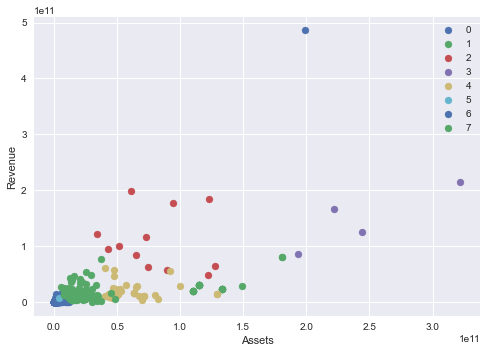

In [181]:
#drop rows with at least one nan
ly_nonan = ly.dropna()

#use kmeans to cluster company
k8 = KMeans()
k8.fit(ly_nonan)
labels_8 = k8.labels_


#plot k means result by assets and revenues
#turn this to numpy array
ly_array = ly_nonan.to_numpy()
#Getting unique labels
u_labels = np.unique(labels_8)
#plotting the results:
fig, ax = plt.subplots()
for i in u_labels:
    ax.scatter(ly_array[labels_8 == i , 0] , ly_array[labels_8 == i , -2] , label = i)
ax.legend()
ax.set_xlabel('Assets')
ax.set_ylabel('Revenue')
fig.show()

In [196]:
print("The pruned dataset contains %d examples." % ly_nonan.shape[0])

The pruned dataset contains 1217 examples.


It is hard to tell whether the k-means are good or not because data lie in 15-dimension space and there is no way we can visulize that. Therefore, we can use PCA to reduce dimension and use first two PCA components to categorize and visulaze data.

The first PCA component explains 76.63686%   variance.
The second PCA component explains 11.96082%  variance.


<ipython-input-191-9262db532d71>:21: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig1.show()


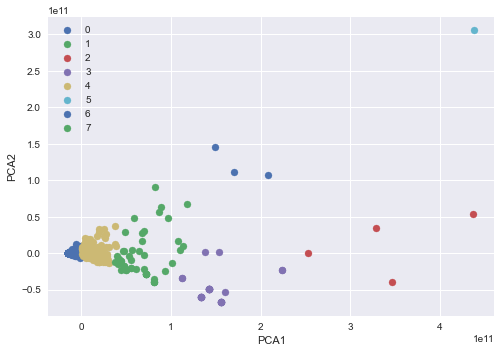

In [191]:
#apply PCA with 2 components
#initialize PCA
pca = PCA(2)
#fit PCA to data and transform it to the components dimension space
ly_pca2 = pca.fit_transform(ly_nonan)
print("The first PCA component explains %.5f%%   variance." % (pca.explained_variance_ratio_[0]*100))
print("The second PCA component explains %.5f%%  variance." % (pca.explained_variance_ratio_[1]*100))

#fit kmeans with pca transformed data
kmeans_pca2 = KMeans(n_clusters= 8)
label_pca2 = kmeans_pca2.fit_predict(ly_pca2)
u_labels_pca2 = np.unique(label_pca2)

#plot result
fig1, ax1 = plt.subplots()
for i in u_labels_pca2:
    ax1.scatter(ly_pca2[label_pca2==i, 0] , ly_pca2[label_pca2==i, 1], label = i)
ax1.legend()
ax1.set_xlabel('PCA1')
ax1.set_ylabel('PCA2')
fig1.show()


The data seems mainly split by the first PCA component. Even though the value ranges of PCA1 and PCA2 are wide, most datapoints are clustered around the origin, so I zoomed in a little bit.

(-50000000000.0, 50000000000.0)

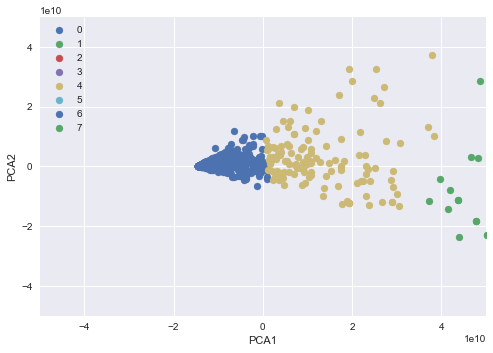

In [192]:
#plot result
fig2, ax2 = plt.subplots()
for i in u_labels_pca2:
    ax2.scatter(ly_pca2[label_pca2==i, 0] , ly_pca2[label_pca2==i, 1], label = i)
ax2.legend()
ax2.set_xlabel('PCA1')
ax2.set_ylabel('PCA2')
ax2.set_ylim(-0.5e11, 0.5e11)
ax2.set_xlim(-0.5e11, 0.5e11)

In [195]:
print("The coefficients of the first PCA component are:", pca.components_[0])
print("The coefficients of the second PCA component are:", pca.components_[1])

The coefficients of the first PCA component are: [ 6.82690964e-01  1.49879146e-01  2.21222447e-02  3.53212408e-02
  2.28862761e-11  8.72124520e-02  4.72682041e-01  1.34431594e-01
 -4.08157672e-03 -6.68631745e-02  6.74677709e-02  5.40138986e-02
  2.46476937e-01  4.33432074e-01  7.42561991e-03]
The coefficients of the second PCA component are: [-2.97053028e-01  1.08580111e-01  2.42941685e-02  1.82643428e-02
  1.57654412e-11 -1.18692469e-02 -2.48983720e-01  8.77127338e-02
 -6.21600402e-02  4.67784774e-02  2.30991200e-02  3.27173982e-02
 -3.12459726e-01  8.50745318e-01  1.28062448e-02]


The result above seems nice, the K-Means nicely clustered data into 8 groups. However, there are still problems. The original data has too many features and we use all of them in PCA, which makes the results inexplainable. Moreover, ignored too many data because of NaN. The original dataset has 9960 samples and there are only 1217 examples after we drop out rows with NaN entries. To improve, we can ignore some of the features in the original data based on PCA components and correlation and covariance table of each features. In both PCA components, features with coefficients bigger than 0.1 are Assets, AssetsCurrent, Liabilities, PropertyPlantAndEquipmentNet, Revenues. In PCA component 1, LiabilitiesCurrent has coefficient also bigger than 0.1.

In [90]:
#Now we examine how many NaN entries each column has.
nan1 = len(ly_pure)-ly_pure['Assets'].count()
nan2 = len(ly_pure)-ly_pure['AssetsCurrent'].count()
nan3 = len(ly_pure)-ly_pure['CashAndCashEquivalentsAtCarryingValue'].count()
nan4 = len(ly_pure)-ly_pure['ComprehensiveIncomeNetOfTax'].count()
nan5 = len(ly_pure)-ly_pure['EarningsPerShareDiluted'].count()
nan6 = len(ly_pure)-ly_pure['Goodwill'].count()
nan7 = len(ly_pure)-ly_pure['Liabilities'].count()
nan8 = len(ly_pure)-ly_pure['LiabilitiesCurrent'].count()
nan9 = len(ly_pure)-ly_pure['NetCashProvidedByUsedInFinancingActivities'].count()
nan10 = len(ly_pure)-ly_pure['NetCashProvidedByUsedInInvestingActivities'].count()
nan11 = len(ly_pure)-ly_pure['NetCashProvidedByUsedInOperatingActivities'].count()
nan12 = len(ly_pure)-ly_pure['OperatingIncomeLoss'].count()
nan13 = len(ly_pure)-ly_pure['PropertyPlantAndEquipmentNet'].count()
nan14 = len(ly_pure)-ly_pure['Revenues'].count()
nan15 = len(ly_pure)-ly_pure['WeightedAverageNumberOfDilutedSharesOutstanding'].count()
print("Number of NaN entries in each column:")
print("Assets: %d" % nan1)
print("AssetsCurrent: %d" %nan2)
print("CashAndCashEquivalentsAtCarryingValue: %d" %nan3)
print("ComprehensiveIncomeNetOfTax: %d" %nan4)
print("EarningsPerShareDiluted: %d" %nan5)
print("Goodwill: %d" %nan6)
print("Liabilities: %d" %nan7)
print("LiabilitiesCurrent: %d" %nan8)
print("NetCashProvidedByUsedInFinancingActivities: %d" %nan9)
print("NetCashProvidedByUsedInInvestingActivities: %d" %nan10)
print("NetCashProvidedByUsedInOperatingActivities: %d" %nan11)
print("OperatingIncomeLoss: %d" %nan12)
print("PropertyPlantAndEquipmentNet: %d" %nan13)
print("Revenues: %d" %nan14)
print("WeightedAverageNumberOfDilutedSharesOutstanding: %d" %nan15)

Number of NaN entries in each column:
Assets: 332
AssetsCurrent: 2461
CashAndCashEquivalentsAtCarryingValue: 1419
ComprehensiveIncomeNetOfTax: 4610
EarningsPerShareDiluted: 5329
Goodwill: 5869
Liabilities: 1771
LiabilitiesCurrent: 2425
NetCashProvidedByUsedInFinancingActivities: 607
NetCashProvidedByUsedInInvestingActivities: 1630
NetCashProvidedByUsedInOperatingActivities: 393
OperatingIncomeLoss: 2769
PropertyPlantAndEquipmentNet: 2615
Revenues: 3667
WeightedAverageNumberOfDilutedSharesOutstanding: 5014


In [197]:
print('Correlation Table')
ly.corr()

Correlation Table


,Assets,AssetsCurrent,CashAndCashEquivalentsAtCarryingValue,ComprehensiveIncomeNetOfTax,EarningsPerShareDiluted,Goodwill,Liabilities,LiabilitiesCurrent,NetCashProvidedByUsedInFinancingActivities,NetCashProvidedByUsedInInvestingActivities,NetCashProvidedByUsedInOperatingActivities,OperatingIncomeLoss,PropertyPlantAndEquipmentNet,Revenues,WeightedAverageNumberOfDilutedSharesOutstanding
Assets,1.000000,0.747448,0.632992,0.510023,-0.001850,0.511751,0.994535,0.829949,-0.232077,0.066038,0.381609,0.745361,0.292447,0.426555,0.017592
AssetsCurrent,0.747448,1.000000,0.803715,0.695483,-0.004661,0.529469,0.715404,0.881869,-0.200614,-0.651468,0.827043,0.752167,0.376810,0.715678,0.015431
CashAndCashEquivalentsAtCarryingValue,0.632992,0.803715,1.000000,0.414647,-0.002110,0.385566,0.590774,0.711587,-0.012100,-0.145072,0.401738,0.647773,0.142398,0.399654,0.015849
ComprehensiveIncomeNetOfTax,0.510023,0.695483,0.414647,1.000000,0.089182,0.573171,0.473045,0.611598,-0.054036,-0.303123,0.785568,0.917047,0.331213,0.625726,0.048308
EarningsPerShareDiluted,-0.001850,-0.004661,-0.002110,0.089182,1.000000,0.047208,-0.001727,-0.004533,0.000053,0.001434,-0.003484,0.124354,0.013410,0.083408,-0.000575
Goodwill,0.511751,0.529469,0.385566,0.573171,0.047208,1.000000,0.442370,0.578172,-0.012892,-0.410635,0.609627,0.554200,0.423041,0.575762,0.018138
Liabilities,0.994535,0.715404,0.590774,0.473045,-0.001727,0.442370,1.000000,0.847481,-0.239744,0.080190,0.375762,0.675842,0.224676,0.361965,0.016258
LiabilitiesCurrent,0.829949,0.881869,0.711587,0.611598,-0.004533,0.578172,0.847481,1.000000,-0.134585,-0.683878,0.800618,0.729433,0.529824,0.826989,0.013394
NetCashProvidedByUsedInFinancingActivities,-0.232077,-0.200614,-0.012100,-0.054036,0.000053,-0.012892,-0.239744,-0.134585,1.000000,-0.878944,-0.019255,-0.322128,-0.001529,-0.101078,-0.004556
NetCashProvidedByUsedInInvestingActivities,0.066038,-0.651468,-0.145072,-0.303123,0.001434,-0.410635,0.080190,-0.683878,-0.878944,1.000000,-0.418178,-0.667105,-0.393542,-0.471320,-0.006029


In [198]:
print('Covariance Table')
ly.cov()

Covariance Table


,Assets,AssetsCurrent,CashAndCashEquivalentsAtCarryingValue,ComprehensiveIncomeNetOfTax,EarningsPerShareDiluted,Goodwill,Liabilities,LiabilitiesCurrent,NetCashProvidedByUsedInFinancingActivities,NetCashProvidedByUsedInInvestingActivities,NetCashProvidedByUsedInOperatingActivities,OperatingIncomeLoss,PropertyPlantAndEquipmentNet,Revenues,WeightedAverageNumberOfDilutedSharesOutstanding
Assets,3.902882e+21,5.455797e+19,8.453781e+19,5.675287e+19,-2.638341e+14,1.678777e+20,4.256696e+21,4.508842e+19,-5.576314e+19,1.929878e+19,3.945594e+19,1.603862e+19,1.129151e+20,2.788004e+20,1.567772e+19
AssetsCurrent,5.455797e+19,2.051655e+19,3.788775e+18,5.253653e+18,-5.630487e+13,1.508553e+19,4.001369e+19,1.379702e+19,-1.095317e+18,-5.848265e+18,6.399432e+18,4.666717e+18,1.533648e+19,4.773486e+19,1.144281e+18
CashAndCashEquivalentsAtCarryingValue,8.453781e+19,3.788775e+18,5.675172e+18,1.655569e+18,-1.237434e+13,5.975517e+18,8.590953e+19,2.509182e+18,-1.000976e+17,-1.487563e+18,1.632258e+18,8.335328e+17,2.346847e+18,1.174083e+19,5.856164e+17
ComprehensiveIncomeNetOfTax,5.675287e+19,5.253653e+18,1.655569e+18,1.793792e+18,1.815069e+09,4.817906e+18,5.676287e+19,3.540203e+18,-3.565895e+17,-2.265295e+18,2.345460e+18,2.072453e+18,4.065478e+18,1.545029e+19,4.424325e+17
EarningsPerShareDiluted,-2.638341e+14,-5.630487e+13,-1.237434e+13,1.815069e+09,2.986840e+12,3.215965e+09,-2.715225e+14,-4.249061e+13,4.225337e+11,1.276349e+13,-1.295106e+13,1.690956e+09,1.708923e+09,1.139450e+10,-6.973739e+12
Goodwill,1.678777e+20,1.508553e+19,5.975517e+18,4.817906e+18,3.215965e+09,2.088755e+19,1.555318e+20,1.213724e+19,-2.139069e+17,-8.253815e+18,7.072995e+18,4.548907e+18,1.746382e+19,4.928280e+19,1.185388e+18
Liabilities,4.256696e+21,4.001369e+19,8.590953e+19,5.676287e+19,-2.715225e+14,1.555318e+20,4.214728e+21,3.644083e+19,-6.470671e+19,2.646365e+19,4.451649e+19,1.143591e+19,8.592833e+19,2.523448e+20,1.605714e+19
LiabilitiesCurrent,4.508842e+19,1.379702e+19,2.509182e+18,3.540203e+18,-4.249061e+13,1.213724e+19,3.644083e+19,1.126571e+19,-5.442054e+17,-4.621820e+18,4.591980e+18,3.307164e+18,1.617569e+19,4.161979e+19,7.736399e+17
NetCashProvidedByUsedInFinancingActivities,-5.576314e+19,-1.095317e+18,-1.000976e+17,-3.565895e+17,4.225337e+11,-2.139069e+17,-6.470671e+19,-5.442054e+17,1.394822e+19,-1.564530e+19,-1.256311e+17,-5.241595e+17,-3.072275e+16,-2.974584e+18,-2.277975e+17
NetCashProvidedByUsedInInvestingActivities,1.929878e+19,-5.848265e+18,-1.487563e+18,-2.265295e+18,1.276349e+13,-8.253815e+18,2.646365e+19,-4.621820e+18,-1.564530e+19,1.950229e+19,-3.406554e+18,-1.759286e+18,-9.121226e+18,-1.984095e+19,-3.380277e+17


Since Liabilities is highly correlated with Assets (>0.99), we can ignore liabilities in our analysis if we consider Assets. Therefore, based on resultes above, we only consider Assets, AssetsCurrent, PropertyPlantAndEquipmentNet, Revenues, and LiabilitiesCurrent in our analysis.

In [199]:
ly_new = ly.drop(columns=['CashAndCashEquivalentsAtCarryingValue', 'ComprehensiveIncomeNetOfTax', 'EarningsPerShareDiluted', 'Goodwill', 'NetCashProvidedByUsedInFinancingActivities', 'NetCashProvidedByUsedInInvestingActivities', 'NetCashProvidedByUsedInOperatingActivities', 'OperatingIncomeLoss', 'WeightedAverageNumberOfDilutedSharesOutstanding', 'Liabilities'])
ly_new_nona = ly_new.dropna()
ly_new_nona.shape
print('After dropping NaN values, we have %d examples remained' % ly_new_nona.shape[0])

After dropping NaN values, we have 4734 examples remained


The first PCA component explains 83.50516%   variance.
The second PCA component explains 11.29782%  variance.


Text(0.5, 1.0, 'K-Means with PCA result by 5 selected features')

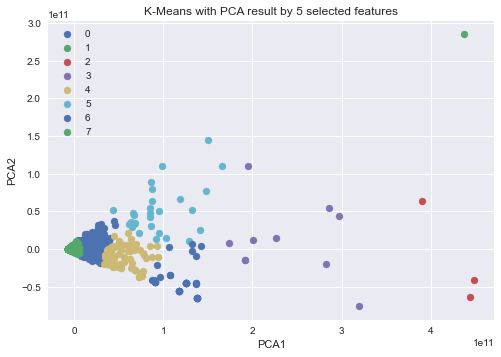

In [200]:
pca_droped = PCA(2)
ly_new_pca = pca_droped.fit_transform(ly_new_nona)
print("The first PCA component explains %.5f%%   variance." % (pca_droped.explained_variance_ratio_[0]*100))
print("The second PCA component explains %.5f%%  variance." % (pca_droped.explained_variance_ratio_[1]*100))

#fit kmeans with pca transformed data
kmeans_pcadroped2 = KMeans(n_clusters = 8)
label_pcadroped2 = kmeans_pcadroped2.fit_predict(ly_new_pca)
u_labels_pcadroped2 = np.unique(label_pcadroped2)

#plot result
fig1, ax1 = plt.subplots()
for i in u_labels_pcadroped2:
    ax1.scatter(ly_new_pca[label_pcadroped2==i, 0] , ly_new_pca[label_pcadroped2==i, 1], label = i)
ax1.legend()
ax1.set_xlabel('PCA1')
ax1.set_ylabel('PCA2')
ax1.set_title('K-Means with PCA result by 5 selected features')

(-10000000000.0, 10000000000.0)

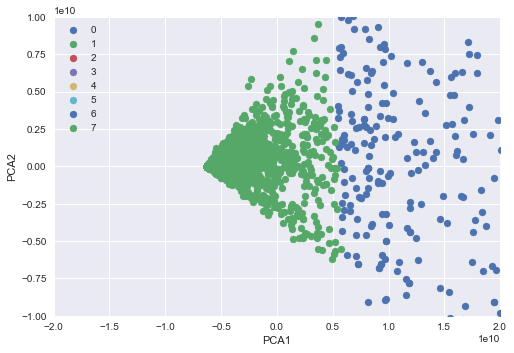

In [201]:
fig1, ax1 = plt.subplots()
for i in u_labels_pcadroped2:
    ax1.scatter(ly_new_pca[label_pcadroped2==i, 0] , ly_new_pca[label_pcadroped2==i, 1], label = i)
ax1.legend()
ax1.set_xlabel('PCA1')
ax1.set_ylabel('PCA2')
ax1.set_xlim(-2e10, 2e10)
ax1.set_ylim(-1e10, 1e10)

In [202]:
print("The coefficients of the first PCA component are:", pca_droped.components_[0])
print("The coefficients of the second PCA component are:", pca_droped.components_[1])

The coefficients of the first PCA component are: [0.78825828 0.17604069 0.14902806 0.3063008  0.48127852]
The coefficients of the second PCA component are: [-0.38140931  0.15173317  0.11173945 -0.41978102  0.80174944]


Now, we perform K-Means successfully after ignoring most features. However, it is still hard to interpret this result since each PCA component is a linear combination of 5 features. By examination, we see that in PCA component 1, Assets has a large coefficient and in PCA component 2, Revenues has a large coefficient. Thus I try to use just these two features to cluster the data.

After droping NaN rows, the data still contains 6222 examples.


Text(0, 0.5, 'Revenues')

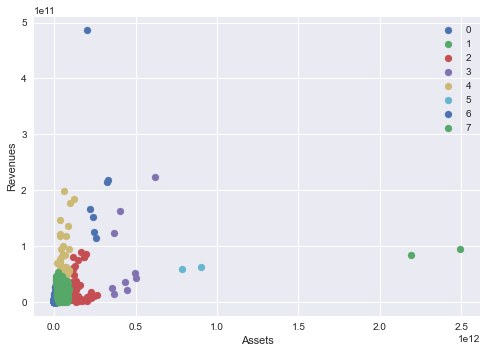

In [204]:
#use only Assets and Revenues
ly_new2 = ly_new.drop(columns = ['AssetsCurrent', 'PropertyPlantAndEquipmentNet', 'LiabilitiesCurrent'])
ly_new2_nonan = ly_new2.dropna()
print("After droping NaN rows, the data still contains %d examples." % ly_new2_nonan.shape[0])

#fit k-means
kmeans_new2 = KMeans(n_clusters = 8)
label_new2 = kmeans_new2.fit_predict(ly_new2_nonan)
u_labels_new2 = np.unique(label_new2)

ly_new2_array = ly_new2_nonan.to_numpy()

#plot results
fig1, ax1 = plt.subplots()
for i in u_labels_new2:
    ax1.scatter(ly_new2_array[label_new2==i, 0] , ly_new2_array[label_new2==i, 1], label = i)
ax1.legend()
ax1.set_xlabel('Assets')
ax1.set_ylabel('Revenues')

(-10000000000.0, 100000000000.0)

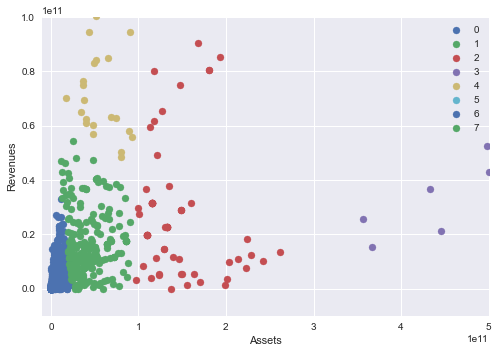

In [205]:
fig1, ax1 = plt.subplots()
for i in u_labels_new2:
    ax1.scatter(ly_new2_array[label_new2==i, 0] , ly_new2_array[label_new2==i, 1], label = i)
ax1.legend()
ax1.set_xlabel('Assets')
ax1.set_ylabel('Revenues')
ax1.set_xlim(-0.1e11, 5e11)
ax1.set_ylim(-0.1e11, 1e11)

Now, we successfully categorized company by their assets and revenues. Most company has small assets and revenues, which make sense.

## 2. Predict Revenue

Now I want to predict the revenue based on other indicators. I first create scatter plot for all other indicators on x-axis and Revenue on y-axis to visualize the relationship between revenue and each other indicator.

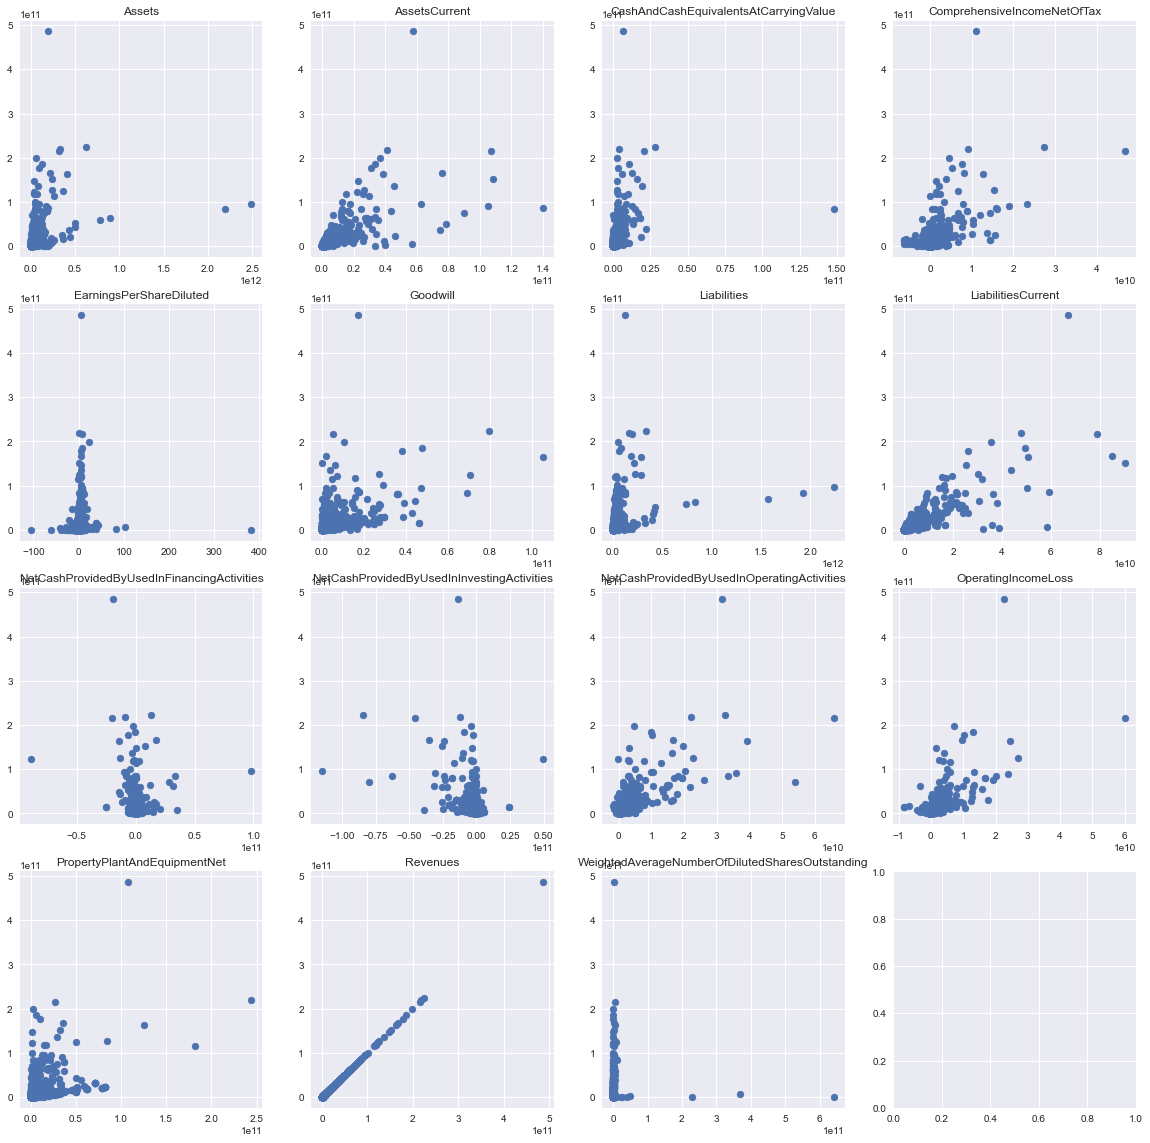

In [143]:
#try to create a plot of each column vs revenue

fig,ax = plt.subplots(4, 4, figsize=(20, 20))
j = 0
for i in ly.axes[1]:
    _ = ax[int(j/4), int(j%4)].scatter(ly[i], ly['Revenues'])
    _ = ax[int(j/4), int(j%4)].set_title(i)
    j = j+1

Based on the correlation table and the figure above, I choose AssetsCurrent, ComprehensiveIncomeNetOfTax, LiabilitiesCurrent, NetCashProvidedByUsedInOperatingActivities, OperatingIncomeLoss to predict Revenue. Also, since there is no clear nonlinear relationship between Revenues and other indicators, I will use linear regression to predict revenues.

After dropping NaN value, the data set has 2907 examples
Mean squared error: 23981399139855835136.00
Coefficient of determination: 0.88


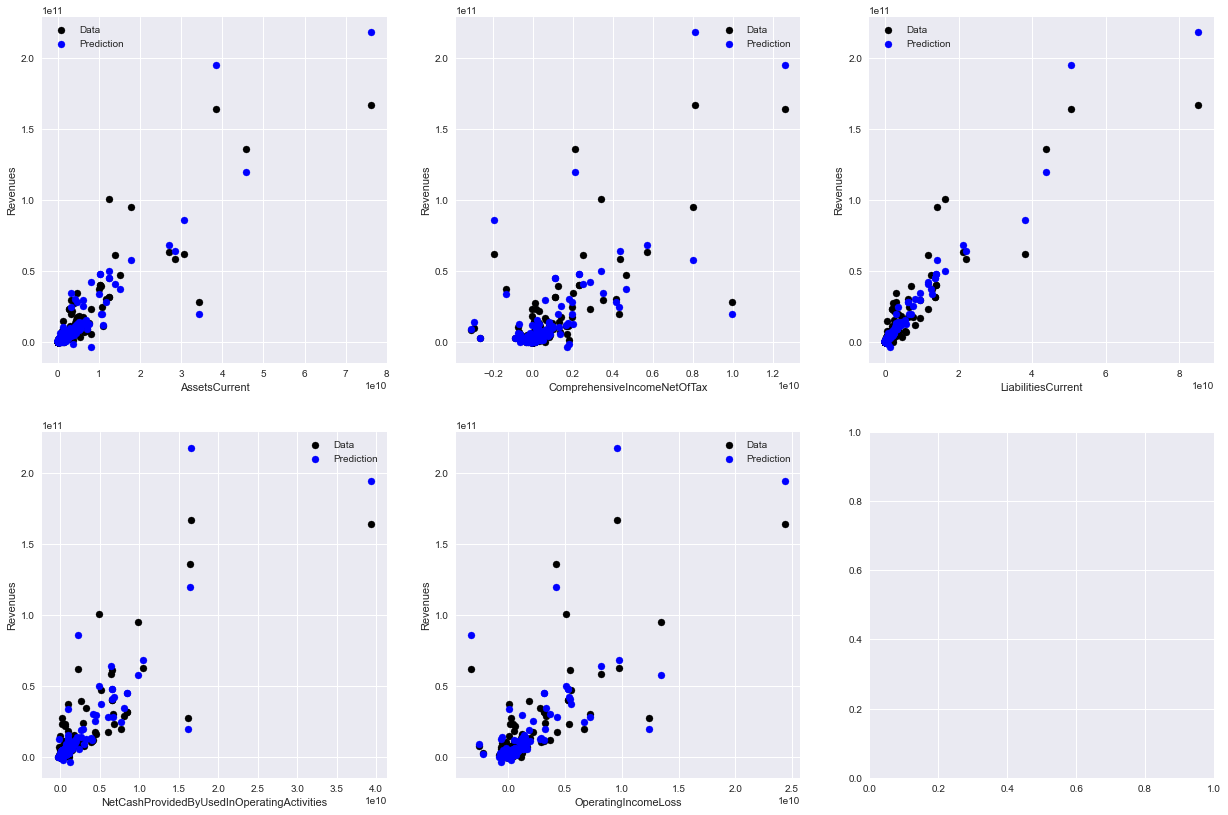

In [215]:
#prune data
ly_re = ly.drop(columns = ['Assets', 'CashAndCashEquivalentsAtCarryingValue'
                           , 'EarningsPerShareDiluted', 'Goodwill',
                            'Liabilities',
                            'NetCashProvidedByUsedInFinancingActivities',
                            'NetCashProvidedByUsedInInvestingActivities',
                            'PropertyPlantAndEquipmentNet', 
                            'WeightedAverageNumberOfDilutedSharesOutstanding'])
ly_re = ly_re.dropna()
print("After dropping NaN value, the data set has %d examples" % ly_re.shape[0])

#split train and test dataset
train, test = train_test_split(ly_re, test_size=0.2)
train_x = train[['AssetsCurrent', 'ComprehensiveIncomeNetOfTax', 
                 'LiabilitiesCurrent', 'NetCashProvidedByUsedInOperatingActivities', 'OperatingIncomeLoss']]
test_x = test[['AssetsCurrent', 'ComprehensiveIncomeNetOfTax', 
                 'LiabilitiesCurrent', 'NetCashProvidedByUsedInOperatingActivities', 'OperatingIncomeLoss']]

train_y = train['Revenues']
test_y = test['Revenues']

#apply linear regression on it
reg = LinearRegression()
#fit training data
reg.fit(train_x, train_y)
#predict test data
predict_y = reg.predict(test_x)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(test_y, predict_y))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(test_y, predict_y))

#plot the prediction and actual data 
fig1, ax1 = plt.subplots(2, 3, figsize = (21, 14))
j = 0
for i in train_x.axes[1]:
    _ = ax1[int(j/3), int(j%3)].scatter(test_x[i], test_y, color = 'black', label = 'Data')
    _ = ax1[int(j/3), int(j%3)].scatter(test_x[i], predict_y, color = 'blue', label = 'Prediction')
    _ = ax1[int(j/3), int(j%3)].set_xlabel(i)
    _ = ax1[int(j/3), int(j%3)].set_ylabel('Revenues')
    _ = ax1[int(j/3), int(j%3)].legend()
    j += 1

Even though the mean squared error is huge, the revenue is also huge (0-3.5e11), so it does not mean the model is bad. Instead, the model has $R^2=0.88$, which is close to 1. Therefore, the model actually predict the real data points well.